# Week 2 - Implementation of Shaffer et al

**Due January 25 at 8 PM**

In [1]:
# This line tells matplotlib to include plots here
% matplotlib inline
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Matlab this is a random number generator whose numbers will be chosen from the desired normal distribution by using the call `normrnd(mu, sigma, [1, n])`. Sample from this normal distribution from n=1 to 50 (I.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

In [2]:
# Initial code here

numRepeats = 1000
mu, sigma = 5.0, 1.0
n = 50
sampleMean = np.empty((n, numRepeats))
nVec = np.array(range(1, n+1))

for i in range(numRepeats):
    for j in range(n):
        sampleMean[j, i] = np.mean(np.random.normal(loc=mu, scale=sigma, size=(j + 1, )))

#### (1a) Plot the standard deviation of the estimate of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

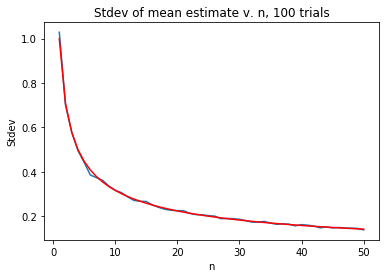

In [3]:
# Answer to 1a here

plt.plot(nVec, np.std(sampleMean, axis=1), label='stddev sample mean')
plt.plot(nVec, 1./np.sqrt(nVec), 'r', label='1/sqrt(n)');
plt.title('Stdev of mean estimate v. n, 100 trials');
plt.ylabel('Stdev');
plt.xlabel('n');

This shows that the standard deviation of the sample mean (also called the standard error) follows a $1/\sqrt{n}$ relationship.

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

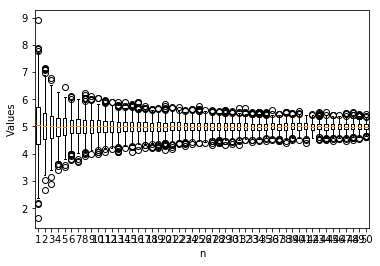

In [4]:
# Answer to 1b here

plt.boxplot(np.transpose(sampleMean));
plt.ylabel('Values');
plt.xlabel('n');

The box plot shows that the values with higher n converge on the true mean (5 in this case). The box plot shows the overall distribution of values in greater detail, while the standard plot is easier to read for a single value plotted over the x-axis.

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal (hint you will need to translate this to the standard normal distribution). Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

0.8820188948890058


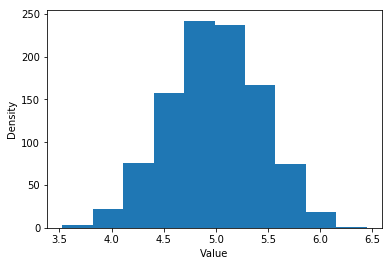

In [5]:
# Answer to 1c here

sampleVec = sampleMean[4, :]
plt.hist(sampleVec)
plt.xlabel('Value')
plt.ylabel('Density')

# Normalize sample mean and stdev
P = kstest(zscore(sampleVec), 'norm')[1]

print(P)

We do not reject the null hypothesis.

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

0.8582959898044679


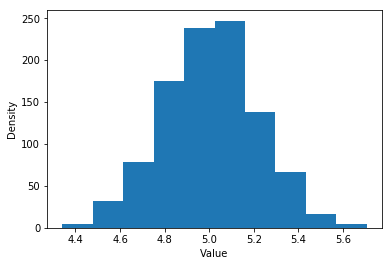

In [6]:
# Answer to 1d here

sampleVec = sampleMean[21, :]
plt.hist(sampleVec)
plt.xlabel('Value')
plt.ylabel('Density')

# Normalize sample mean and stdev
P = kstest(zscore(sampleVec), 'norm')[1]

print(P)

Nothing changes in this case. For both low and high n the sample mean is normally distributed.

## (2) Weibull distribution. Now we will explore sampling from an alternate distribution type.

#### (2a) Sample the Weibull distribution with parameters a = 1, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

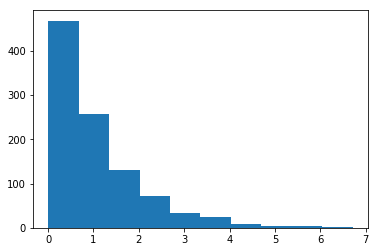

In [7]:
# Answer 2a here

Wvec = np.random.weibull(1, size=(1000, ))

plt.hist(Wvec);

Doesn't look anything like a normal distribution. Much heavier right tail.

#### (2b) As in problem 1, plot a boxplot of the sample distribution of the Weibull with A=1,B=1 from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

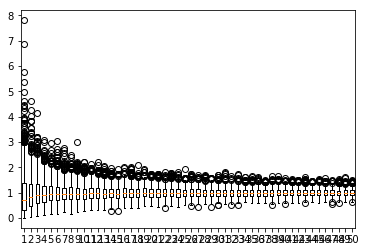

In [8]:
# Answer 2b here

sampleMean = np.empty((1000, n))

for i in range(sampleMean.shape[0]):
    for j in range(n):
        sampleMean[i, j] = np.mean(np.random.weibull(1.0, size=(j + 1, )))

plt.boxplot(sampleMean);

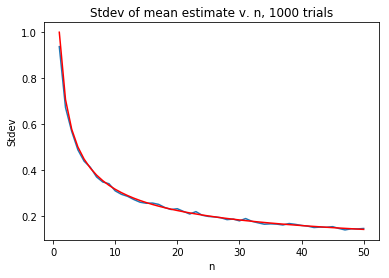

In [9]:
nVec = np.arange(1, n+1)

plt.plot(nVec, np.std(sampleMean, axis=0), label='stddev sample mean')
plt.plot(nVec, 1./np.sqrt(nVec), 'r', label='1/sqrt(n)');
plt.title('Stdev of mean estimate v. n, 1000 trials');
plt.ylabel('Stdev');
plt.xlabel('n');

Doesn't differ from 1b.

#### (2c) For n=3, plot the histogram of the sample means. What is this distribution, is it Weibull or normal? Report your test results.

0.9306998616154375
3.849915719555952e-09


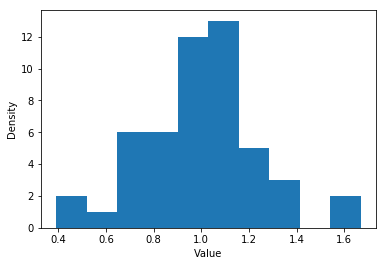

In [10]:
sampleVec = sampleMean[2, :]
plt.hist(sampleVec)
plt.xlabel('Value')
plt.ylabel('Density')

# Normalize sample mean and stdev
Pnorm = kstest(zscore(sampleVec), 'norm')[1]
Pweib = kstest(sampleVec, 'expon')[1]
# Scipy and numpy's weibull distributions are different, but a weibull(a=1)
# is the same as an exponential distribution.

print(Pnorm)
print(Pweib)

This distribution is closer to normal.

#### 2d. Repeat 2c and 2d for n=20 (don’t include the plots, but do include the test result for normality and explain the impact of the number of samples n, on normality).

0.9090854097141294
4.392930463836819e-12


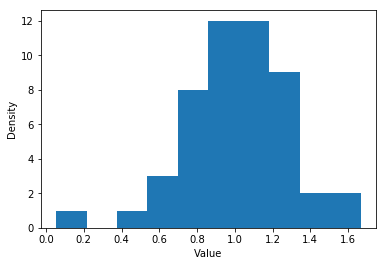

In [11]:
sampleVec = sampleMean[19, :]
plt.hist(sampleVec)
plt.xlabel('Value')
plt.ylabel('Density')

# Normalize sample mean and stdev
Pnorm = kstest(zscore(sampleVec), 'norm')[1]
Pweib = kstest(zscore(sampleVec), 'expon')[1]

print(Pnorm)
print(Pweib)

Also looks normally distributed.

#### 2e. Repeat 2c but with A=10 and B=2 (I.e plot the histogram of the calculated sample means for 1000 trials of n=3). What is this distribution, Weibull or normal? Why does it look different than in 1c?

In [12]:
# Answer to 2f

# The distribution changes shape but the same outcomes, of the sampling distribution
# morphing to look normally distributed as N increases, hold.

## (3) Differential expression . In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

In [13]:
dOne = lambda n: np.random.normal(loc=1.0, scale=1.0, size=(n, ))
dTwo = lambda n: np.random.normal(loc=3.0, scale=1.0, size=(n, ))

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [14]:
def falseNeg(n=3, nTrial=100, p=0.05):
    compare = np.empty((nTrial, ))

    for ii, _ in enumerate(compare):
        compare[ii] = ttest_ind(dOne(n), dTwo(n), equal_var=False)[1]
        
    return sum(compare > p)

print(falseNeg())

64


In reality these are two distributions, so the test has missed an occasion when we should have rejected the null hypothesis.

#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [15]:
def falsePos(n=3, nTrial=100, p=0.05):
    compare = np.empty((nTrial, ))

    for ii in range(len(compare)):
        compare[ii] = ttest_ind(dOne(n), dOne(n), equal_var=False)[1]
        
    return sum(compare < p)

print(falsePos())

1


These are the same distribution, so the null hypothesis is true.

#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [16]:
print(falsePos(nTrial=1000))
print(falsePos(nTrial=10000))

41
357


Number of false positives is p-value * trials, so proportional to the number of trials run.

#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

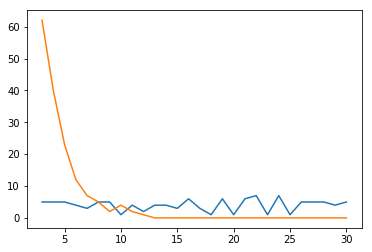

In [17]:
nVec = np.array(range(3, 31))
fPos = np.empty(nVec.shape)
fNeg = np.empty(nVec.shape)

for nn, nItem in enumerate(nVec):
    fPos[nn] = falsePos(n=nItem)
    fNeg[nn] = falseNeg(n=nItem)
    
plt.plot(nVec, fPos);
plt.plot(nVec, fNeg);

Number of false positives is not dependent upon $n$, while the number of false negatives is.

#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [18]:
dThree = lambda n: np.random.normal(loc=3.0, scale=2.0, size=(n, ))

def falseNegB(n=3, nTrial=100):
    compare = np.empty((nTrial, ))

    for ii, _ in enumerate(compare):
        compare[ii] = ttest_ind(dOne(n), dThree(n), equal_var=False)[1]
        
    return sum(compare > 0.05)

print(falseNegB())

86


The number of false negatives increases with sigma.

#### (3f) Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

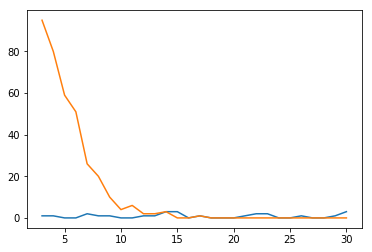

In [19]:
nVec = np.array(range(3, 31))
fPos = np.empty(nVec.shape)
fNeg = np.empty(nVec.shape)

for nn, nItem in enumerate(nVec):
    fPos[nn] = falsePos(n=nItem, p=0.01)
    fNeg[nn] = falseNeg(n=nItem, p=0.01)
    
plt.plot(nVec, fPos);
plt.plot(nVec, fNeg);

This decreases the number of false positives but increases the number of false negatives.

## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

In [20]:
repOne = np.loadtxt("data/wk2/expt_rep1.csv")
repTwo = np.loadtxt("data/wk2/expt_rep2.csv")

#### (5a) First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

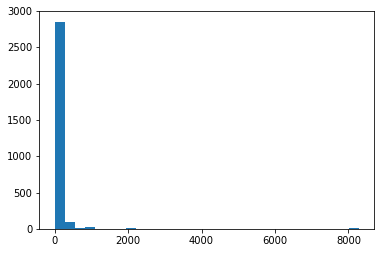

In [21]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2 * nCells  # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = 2 * nMuts + newMuts  # Previous mutants divide and add
        nCells = nCells - newMuts  # Non-resistant pop goes down by newMuts

    return nMuts

def CVofNRuns(N, cultureSize, mutationRate):
    return np.fromiter((simLuriaDelbruck(cultureSize, mutationRate) for x in range(N)), dtype = np.int)

cvs = CVofNRuns(3000, 120000, 0.0001)

plt.hist(cvs, bins=30);

#### (5b) Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [22]:
ks_2samp(repOne/np.mean(repOne), repTwo/np.mean(repTwo))

Ks_2sampResult(statistic=0.25100240577385735, pvalue=0.19275155911638572)

#### (5c) Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [23]:
ks_2samp(repOne/np.mean(repOne), cvs/np.mean(cvs))

Ks_2sampResult(statistic=0.6293875968992249, pvalue=1.244955761027369e-15)

#### (5d) We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

Could loop across different values of them, to check that you always get the same outcome.